In [25]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("forecasting_ready_1.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Pick one SKU
sku = df["SKU_ID"].unique()[0]

sku_df = df[df["SKU_ID"] == sku][["Date", "Units_Sold"]]

sku_df = sku_df.rename(columns={
    "Date": "ds",
    "Units_Sold": "y"
})

sku_df = sku_df.sort_values("ds")

In [27]:
split_days = 150

train = sku_df[:-split_days]
test = sku_df[-split_days:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 215
Test size: 150


In [28]:
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True
)

model.fit(train)

10:25:38 - cmdstanpy - INFO - Chain [1] start processing
10:25:38 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=split_days)
forecast = model.predict(future)

In [30]:
predicted = forecast.tail(split_days)["yhat"].values
actual = test["y"].values

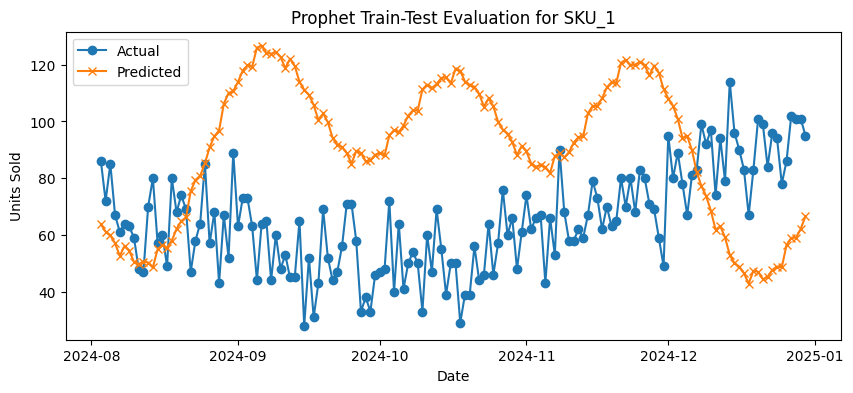

In [31]:
plt.figure(figsize=(10,4))
plt.plot(test["ds"], actual, label="Actual", marker="o")
plt.plot(test["ds"], predicted, label="Predicted", marker="x")
plt.legend()
plt.title(f"Prophet Train-Test Evaluation for {sku}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


In [32]:
mae = abs(actual - predicted).mean()
rmse = ((actual - predicted) ** 2).mean() ** 0.5

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

MAE  : 38.62
RMSE : 43.88
